# Data Wrangling

In [92]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [93]:
df = sns.load_dataset('titanic')

In [94]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [95]:
df.info

<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_m

In [96]:
df.drop(columns='deck', inplace=True)

In [97]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [98]:
df.isnull().sum() / len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [99]:
df['age'] = df['age'].astype(float).fillna(value=df['age'].mean())


In [100]:
df.isnull().sum() / len(df)*100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.224467
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

In [101]:
df.shape

(891, 14)

In [102]:
df['embarked']=df.embarked.fillna(value =df['embarked'].mode()[0])

In [103]:
df.shape

(891, 14)

In [104]:
df['embark_town']=df.embark_town.fillna(value =df['embark_town'].mode()[0])

In [105]:
df.shape

(891, 14)

In [106]:
df.isnull().sum() / len(df)*100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

# Outliers Removal

<Axes: xlabel='sex', ylabel='age'>

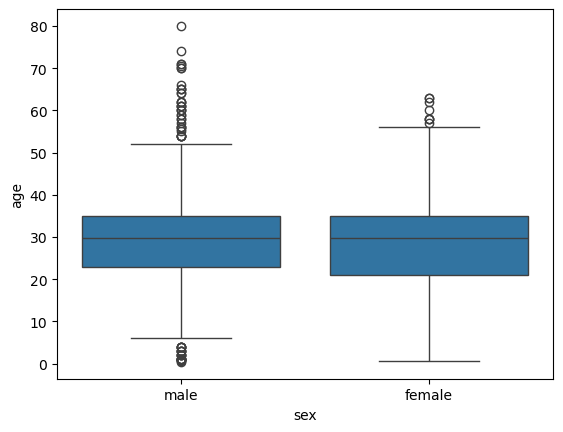

In [107]:
sns.boxplot(data=df, y='age', x= 'sex')

In [108]:
# IQR Method 
Q1 = df['age'].quantile(.25)
 
Q3 = df['age'].quantile(.75)
IQR = Q3 - Q1- Q1
IQR

-9.0

In [109]:
# IQR Method 
Q1 = df['age'].quantile(.25)
Q3 = df['age'].quantile(.75)
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['age']>lower_bound) & (df['age']<upper_bound)]


In [110]:
# IQR Method 
Q1 = df['fare'].quantile(.25)
Q3 = df['fare'].quantile(.75)
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['fare']>lower_bound) & (df['fare']<upper_bound)]


In [111]:
df.shape

(718, 14)

<Axes: xlabel='age', ylabel='Count'>

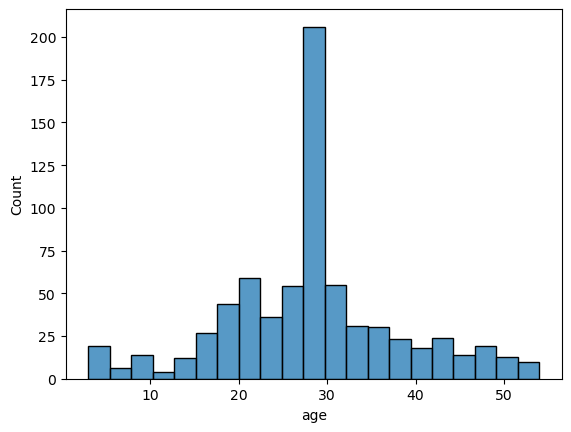

In [112]:
sns.histplot(df['age'])

<Axes: xlabel='fare', ylabel='Count'>

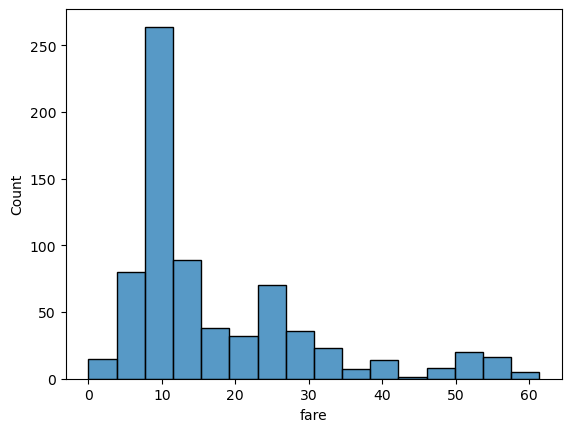

In [113]:
sns.histplot(df['fare'])

In [114]:
from scipy import stats
import numpy as np

# Calculate Z-scores
zscore = np.abs(stats.zscore(df['age']))

# Set threshold
threshold = 3

# Filter the DataFrame to exclude outliers
df = df[zscore < threshold]


In [115]:
# Z-score method
from scipy import stats
import numpy as np
zscore = nb.abs(stats.zscore(df['age']))
threshold = 3
df = df[('z<threshold').all(axis=1)]

NameError: name 'nb' is not defined

In [141]:
# finding duplicates first
df.duplicated().sum()

103

In [142]:
df.shape

(718, 14)

In [138]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True


In [116]:
df1 = df.duplicated()

In [117]:
df1.head()

0    False
2    False
3    False
4    False
5    False
dtype: bool

In [63]:
df1

0      False
2      False
3      False
4      False
5      False
       ...  
885    False
887    False
888    False
889    False
890    False
Length: 615, dtype: bool

In [127]:
df_duplicates= df[df.duplicated()]
df_duplicates.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [128]:
df_duplicates.shape

(103, 14)

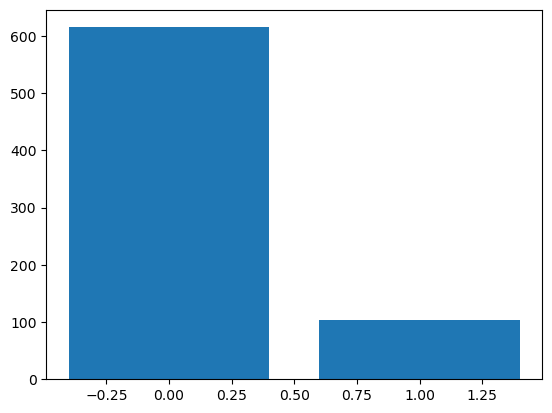

In [136]:
# Count duplicates (True = duplicated, False = not duplicated)
df_duplicates_count = df_duplicates.value_counts()
plt.bar(df_duplicates_count.index, df_duplicates_count.values)
plt.show()



In [59]:
## Finding and droping dupl;icates
df.drop_duplicates(inplace= True)

In [140]:
df.shape

(718, 14)

In [143]:
df.drop_duplicates(inplace=True)

In [163]:
df.shape

(615, 14)

# Data Normalization
To bring data at one scale

imp

In [194]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# data
df

# Select colomns to normalize data
cols_to_normalize = ['age', 'fare']

# Creat a scaler function or tool
scaler = MinMaxScaler()

# fit and transform the data  on scaler or viseversa
df[cols_to_normalize] = scaler.fit_transform= (df[cols_to_normalize])

# Check the data
df

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,0
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False,5
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True,0
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False,3
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,0


In [150]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,0.360976,2.469919,28.376776,0.460163,0.365854,18.342005
std,0.480674,0.741063,10.683717,0.894039,0.835572,13.585289
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,13.000000
75%,1.000000,3.000000,34.000000,1.000000,0.000000,26.000000
max,1.000000,3.000000,54.000000,5.000000,6.000000,61.379200


In [152]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# data
df

# Select colomns to normalize data
cols_to_normalize = ['age', 'fare']

# Creat a scaler function or tool
scaler = StandardScaler()

# fit and transform the data  on scaler or viseversa
df[cols_to_normalize] = scaler.fit_transform= (df[cols_to_normalize])

# Check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


# Standard scaler equation
x_stand = (x-mean(x))/std(x)

x_stands for standardized variable\
x is the original variable\
mean(x) is the mean of variable x\
std(x) is the standard deviation of variable x

# Log Transformation

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# data
df

# Select colomns to normalize data
cols_to_normalize = ['age', 'fare']

# Creat a scaler function or tool
scaler = StandardScaler()

# fit and transform the data  on scaler or viseversa
df[cols_to_normalize] = scaler.fit_transform= (df[cols_to_normalize])

# Check the data
df

In [172]:
kashti = sns.load_dataset('titanic')
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [167]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [168]:
import numpy as np
kashti['age'] = kashti['age'].fillna(kashti['age'].median())
kashti['fare'] = kashti['fare'].fillna(kashti['fare'].median())

# log transformation
kashti['age'] = np.log(kashti['age'])
kashti['fare'] = np.log(kashti['fare'])
kashti.head()

c:\Users\ALR\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex', ylabel='age'>

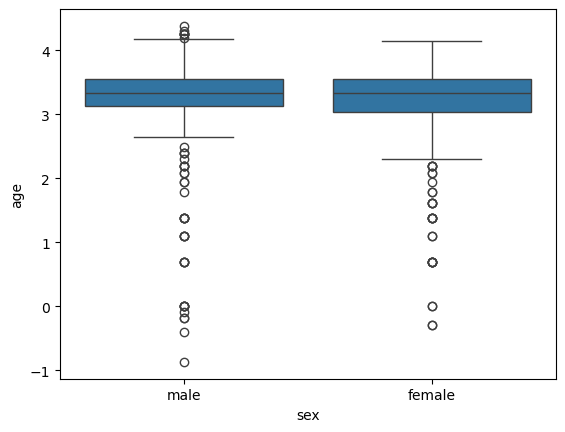

In [ ]:
sns.boxplot(data=kashti, x='sex', y='age') # box plot with sex as x and age as y

<Axes: xlabel='sex', ylabel='fare'>

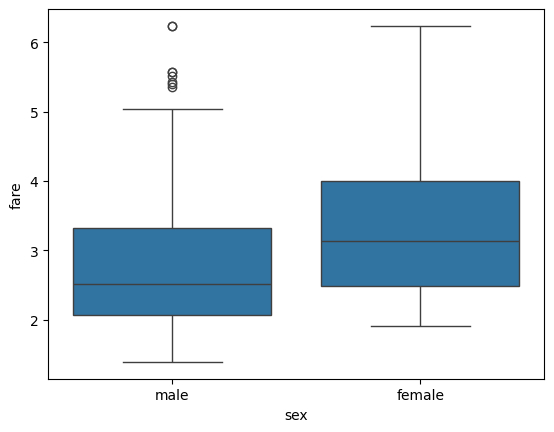

In [170]:
sns.boxplot(data=kashti, x='sex', y='fare') # box plot with sex as x and fare as y

<Axes: xlabel='age', ylabel='Count'>

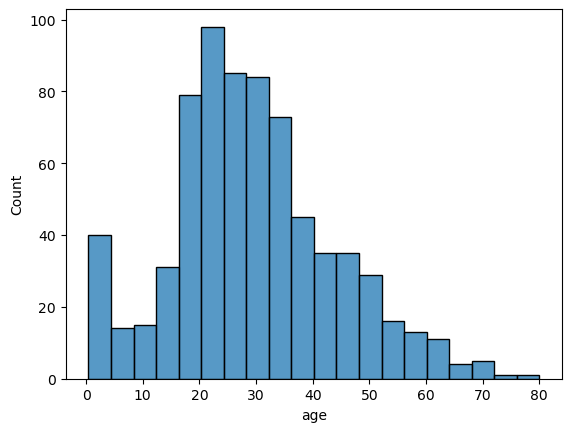

In [173]:
sns.histplot(kashti['age'])

<Axes: xlabel='age', ylabel='Count'>

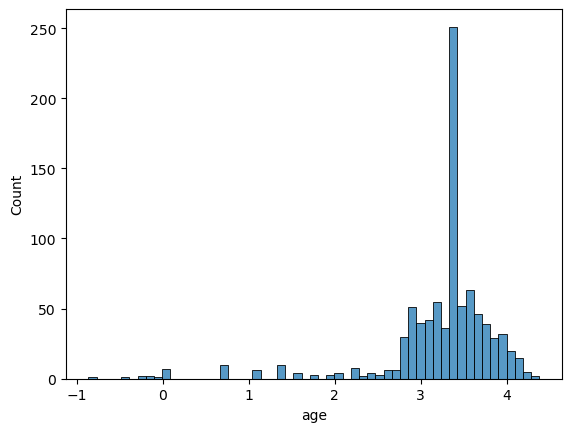

In [171]:
sns.histplot(kashti['age'])

# Organising data
# We have a list of dictionaries, where each dictionary represents a person with their name, age, and occupation.
# We want to sort this list based on the age of the people in ascending order. 
# We will use the sorted() function with a custom key to achieve this.
# The key function will take a dictionary as input and return the age of the person.
# We will use a lambda function to define the key function.
# The sorted() function will return a new sorted list and leave the original list unchanged.
# We will assign the result to a new variable called sorted_people
sorted_people = sorted(people, key=lambda x: x['age'])
print(sorted_people)  # Output: [{'name': 'John', 'age': 25,
# 'occupation': 'Engineer'}, {'name': 'Alice', 'age': 30,
# 'occupation': 'Doctor'}, {'name': 'Bob', 'age': 20,
# 'occupation': 'Teacher'}]
# The list is now sorted by age in ascending order.<|eom_id|><|start_header_id|>assistant



In [176]:
# family size
df['family_size'] =  df['sibsp'] + df['parch']

In [177]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

<Axes: xlabel='family_size', ylabel='Count'>

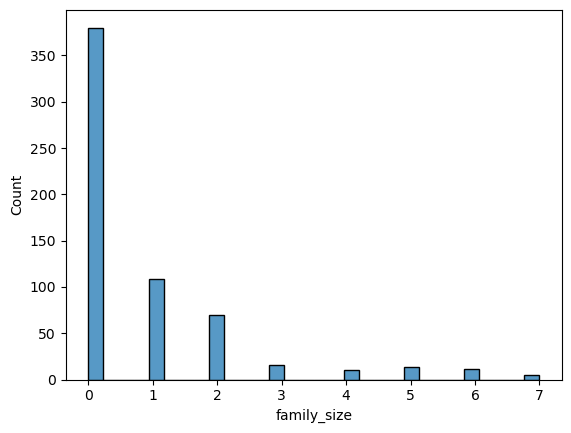

In [178]:
sns.histplot(df['family_size'])

c:\Users\ALR\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='age'>

c:\Users\ALR\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ALR\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


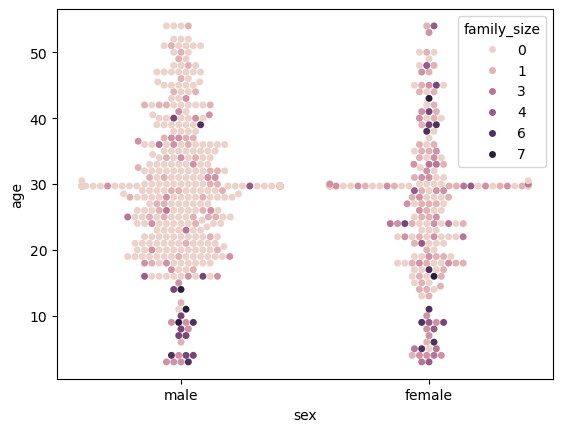

In [185]:
sns.swarmplot(data=df, x="sex", y= "age", hue="family_size") #title=['Age by Sex'])  # Create a swarm plot to show the distribution of age by sex

c:\Users\ALR\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 61.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ALR\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='family_size'>

c:\Users\ALR\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ALR\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


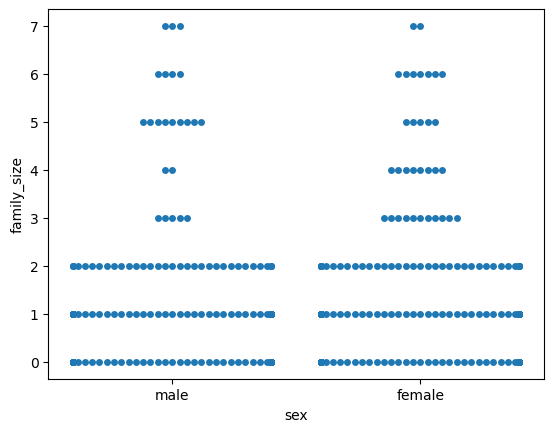

In [179]:
sns.swarmplot(data=df, x="sex", y= "family_size")

In [186]:
df = df.rename(columns= {'survived': 'survival'})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [188]:
table = pd.pivot_table(df, values='fare', index='pclass',
                       columns = "survival", aggfunc = np.sum)
table



C:\Users\ALR\AppData\Local\Temp\ipykernel_13580\2142011490.py:1: FutureWarning: The provided callable <function sum at 0x000001271DD096C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = pd.pivot_table(df, values='fare', index='pclass',


survival,0,1
pclass,,
1,1354.6707,2150.5295
2,1269.6458,1509.5917
3,3720.1580,1275.7375


In [190]:
table = pd.pivot_table(df, values='fare', index='pclass',
                       columns = "survival", aggfunc = np.mean) # Adding mean to fare
table



C:\Users\ALR\AppData\Local\Temp\ipykernel_13580\3095138053.py:1: FutureWarning: The provided callable <function mean at 0x000001271DD0A7A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(df, values='fare', index='pclass',


survival,0,1
pclass,,
1,34.735146,40.576028
2,18.137797,20.966551
3,13.099148,13.151933


<Axes: xlabel='fare', ylabel='age'>

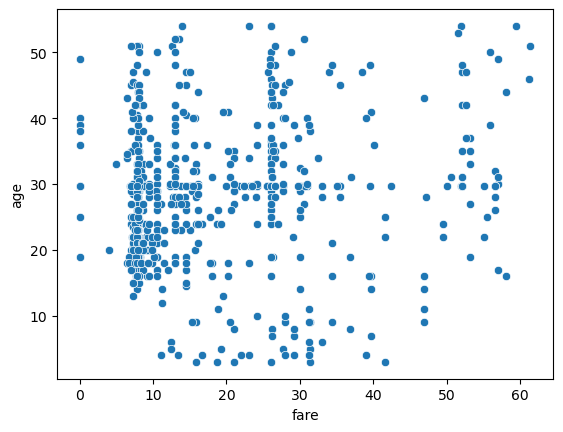

In [192]:
sns.scatterplot(data=df, x='fare', y='age')


In [196]:
# family size
df['family_size'] =  df['sibsp'] + df['parch']

In [197]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,0
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True,0


In [195]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True,0
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,Queenstown,no,True,0


# Saving the wrangled data


In [198]:
df.to_csv("preprocessor_data.csv")

<Axes: xlabel='family_size', ylabel='age'>

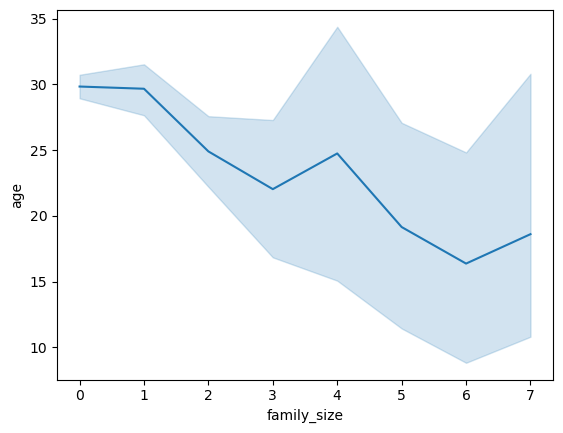

In [200]:
sns.lineplot(data=df, x="family_size", y="age")